In [1]:
import sys
sys.path.append('../Codes/Kitas_Schools')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return np.log(a)+np.log(np.sqrt(-b)) + b*(x-c)**2

Text_files_path = '../../../../../Dropbox/Research/Epidemiology_2020/Text_files/Kitas_Schools/'
print(style.available)
#style.use('seaborn-paper')
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


In [2]:
def my_plot_layout(ax, yscale = 'linear', xscale = 'linear', ticks_labelsize = 24,
                   xlabel = '', ylabel = '', title = '', x_fontsize=24, y_fontsize = 24,
                   t_fontsize = 24):
    ax.tick_params(labelsize = ticks_labelsize)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)
    ax.set_xlabel(xlabel, fontsize = x_fontsize)
    ax.set_ylabel(ylabel, fontsize = y_fontsize)
    ax.set_title(title, fontsize = y_fontsize)

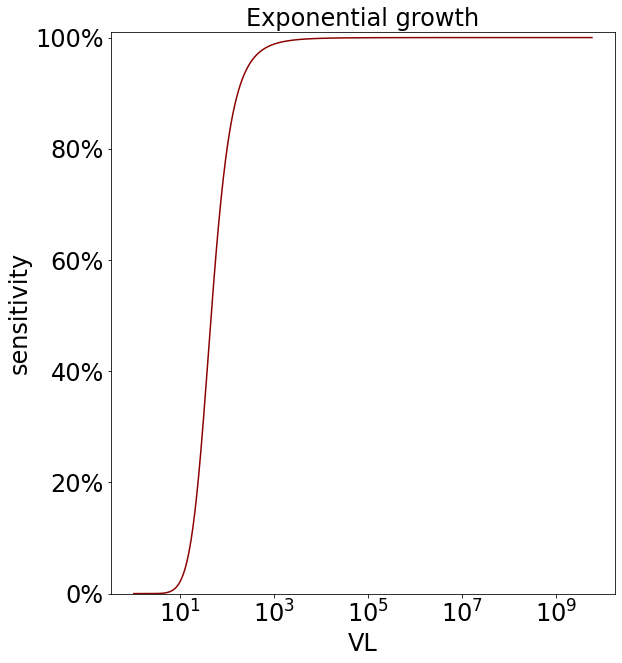

In [274]:
g = 4.5
time = np.linspace(0, 5, 1000)
virus = np.exp(g * time)
sensitivity = (1/(1+(np.log10(virus[1:])/(1.66))**(-7.49)))
t_inc = 3
tau = 0
fig, ax  = plt.subplots(figsize = (10,10), gridspec_kw={'bottom':0.1, 'left':0.2})
ax.plot(virus[1:], sensitivity, color = 'darkred')
#ax.fill_between(time[1:], 1e4*(1/(1+(time[1:]/5)**(-6))), np.ones_like(time[1:])*1, alpha = .8)
#ax.vlines([t_inc, t_inc-tau], 1, [np.exp(g * t_inc), np.exp(g * (t_inc-tau))], linestyle = '--', color = ['grey', 'darkgrey'])
#ax.hlines([np.exp(g * t_inc), np.exp(g * (t_inc-tau))], 0, [t_inc, t_inc-tau], linestyle = '--', color = ['grey', 'darkgrey'])
ax.set_ylim(0, 1.01)
my_plot_layout(ax, xscale = 'log', yscale = 'linear', xlabel = 'VL', ylabel = 'sensitivity',
              title = 'Exponential growth')
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig('../../Figures/Kitas_Schools/sensitivity_fit.pdf')



In [235]:
data = pd.read_excel('../../../../../Dropbox/Research/Epidemiology_2020/Text_files/Kitas_Schools/data/Sensitivität.xlsx', header = 1)
data2 = pd.read_excel('../../../../../Dropbox/Research/Epidemiology_2020/Text_files/Kitas_Schools/data/210420_RADT_sens.xlsx', header = 0)
antigen = (data['Sensitivity.2']+ data2['Sensitivity'])/2
data['Sensitivity'], data2['Sensitivity'], antigen

(0           NaN
 1    100.000000
 2    100.000000
 3    100.000000
 4     95.652174
 5     94.117647
 6     82.352941
 7     56.000000
 8     50.000000
 9      0.000000
 Name: Sensitivity, dtype: float64,
 0    100.00
 1    100.00
 2     96.43
 3    100.00
 4     86.36
 5     29.17
 6      9.68
 7      2.77
 8     12.50
 9      0.00
 Name: Sensitivity, dtype: float64,
 0       NaN
 1    99.500
 2    96.215
 3    98.000
 4    84.180
 5    42.585
 6     4.840
 7     1.385
 8     6.250
 9     0.000
 dtype: float64)

1.2483514816134205 3.3870931739167482 3.3750382460320076
-2.0784141340151243 -6.189625018988339 -4.397920018223962
0.45521598111559824 -6.189625018988339 -4.397920018223962


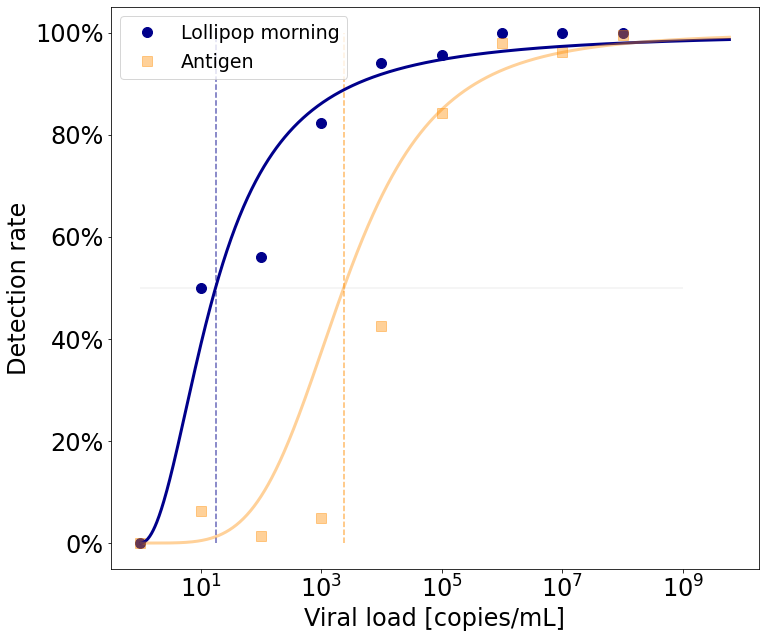

In [286]:
fig, ax  = plt.subplots(figsize = (15,10), gridspec_kw={'bottom':0.1, 'left':0.2, 'right':.8})

ax.plot(data['from'][1:], data['Sensitivity'][1:]/100, marker = 'o', ms = 10, linestyle = '', color = 'darkblue', label = 'Lollipop morning', linewidth = 3)
#ax.plot(data['from'][1:], data['Sensitivity.1'][1:]/100, marker = '.', ms = 14, linestyle = '', color = 'lightblue', alpha = .6, label = 'Lollipop random')
#ax.plot(data['from'][1:-1], data['Sensitivity.2'][1:-1]/100, marker = 'o', ms = 8, linestyle = '', color = 'darkorange', alpha = .8, label = 'Antigen')
#ax.plot(data2['Copies/ml'][1:], data2['Sensitivity'][1:]/100, marker = '.', ms = 8, linestyle = '', color = 'darkorange', alpha = .8, label = 'Antigen2')
ax.plot(data['from'][:], antigen[:]/100, marker = 's', ms = 10, linestyle = '', color = 'darkorange', alpha = .4, label = 'Antigen', linewidth = 3)

popt1, pcov1 = curve_fit(my_linear_func, xdata=np.log(np.log10(data['from'][4:-1])), ydata=np.log((1/(abs(data['Sensitivity'][4:-1]-0.0001)/100.0))-1), p0 = (2, -6))
popt2, pcov2 = curve_fit(my_linear_func, xdata=np.log(np.log10(data['from'][0:-2])), ydata=np.log((1/((data['Sensitivity.1'][0:-2]-0.0001)/100.0))-1), p0 = (1, -4))
#popt3, pcov3 = curve_fit(my_linear_func, xdata=np.log(np.log10(data['from'][1:-4])), ydata=np.log((1/((data['Sensitivity.2'][1:-4]-0.0001)/100.0))-1), p0 = (1, -4))
#popt4, pcov4 = curve_fit(my_linear_func, xdata=np.log(np.log10(data2['Copies/ml'][:-1])), ydata=np.log((1/((data2['Sensitivity'][:-1]-0.0001)/100.0))-1), p0 = (1, -4))
popt5, pcov5 = curve_fit(my_linear_func, xdata=np.log(np.log10(data['from'][1:-1])), ydata=np.log((1/(abs(antigen[1:-1]-0.0001)/100.0))-1), p0 = (1, -4))

print((np.exp(-popt1[0]/popt1[1])), (np.exp(-popt2[0]/popt2[1])), (np.exp(-popt5[0]/popt5[1])))
print(popt1[1], popt2[1], popt5[1])
print(np.sqrt(pcov1[1,1]), popt2[1], popt5[1])

ax.plot(virus[1:], 1/(np.exp(my_linear_func(np.log(np.log10(virus[1:])), *popt1))+1), color = 'darkblue', linewidth = 3)
#ax.plot(virus[1:], 1/(np.exp(my_linear_func(np.log(np.log10(virus[1:])), *popt2))+1), color = 'lightblue', linewidth = 3, alpha = .6)
#ax.plot(virus[1:], 1/(np.exp(my_linear_func(np.log(np.log10(virus[1:])), *popt3))+1), color = 'darkorange', alpha = .8)
#ax.plot(virus[1:], 1/(np.exp(my_linear_func(np.log(np.log10(virus[1:])), *popt4))+1), color = 'darkorange', alpha = .8)
ax.plot(virus[1:], 1/(np.exp(my_linear_func(np.log(np.log10(virus[1:])), *popt5))+1), color = 'darkorange', alpha = .4, linewidth = 3)

ax.vlines([10**(np.exp(-popt1[0]/popt1[1])), 10**(np.exp(-popt5[0]/popt5[1]))], 0, 1, colors = ['darkblue', 'darkorange', 'darkorange'], linestyle = '--', alpha = .6)
ax.hlines([.5], 1, 1e9, alpha = .2, color = 'silver')

my_plot_layout(ax, xscale = 'log', xlabel = 'Viral load [copies/mL]', ylabel = 'Detection rate')
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.legend(fontsize = 19)
fig.savefig('../../Figures/Kitas_Schools/0_Sensitivity/fit.pdf')


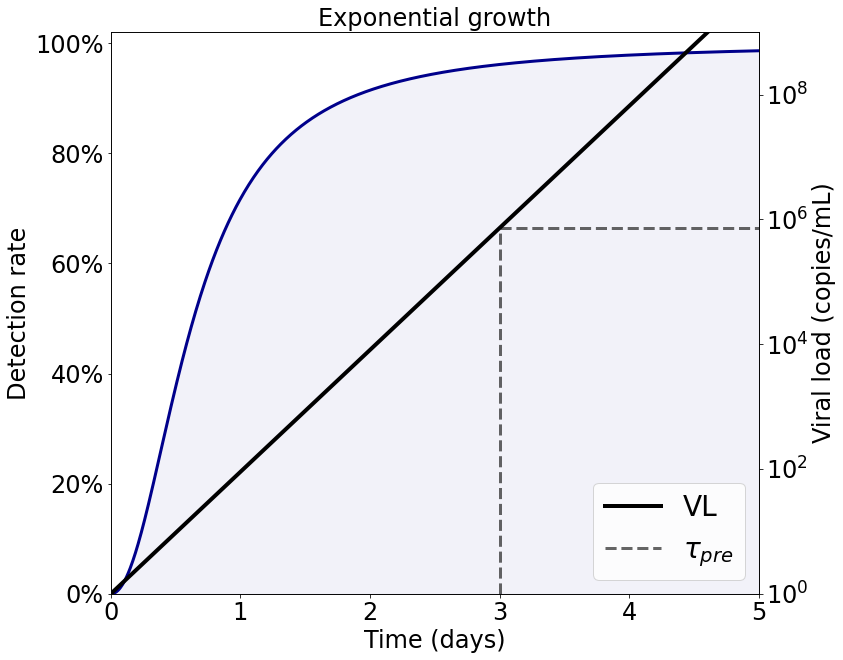

In [281]:
fig, ax  = plt.subplots(figsize = (15,10), gridspec_kw={'bottom':0.1, 'left':0.2, 'right':.8})

sensitivity1 = (1/(1+(np.log10(virus[1:])/((np.exp(-popt1[0]/popt1[1]))))**(popt1[1])))
sensitivity2 = (1/(1+(np.log10(virus[1:])/((np.exp(-popt2[0]/popt2[1]))))**(popt2[1])))
sensitivity3 = (1/(1+(np.log10(virus[1:])/((np.exp(-popt5[0]/popt5[1]))))**(popt5[1])))

ax.plot(time[1:], sensitivity1 , color = 'darkblue', label = 'lollipop', linewidth = 3)
#ax.plot(time[1:], sensitivity2 , color = 'lightblue')
#ax.plot(time[1:], sensitivity3 , color = 'darkorange', label = 'antigen', linewidth = 3)
#ax.plot(time, np.heaviside(time - (t_inc-tau), 0), color = 'silver', linewidth = 3, label  = 'control')

#ax.vlines([np.log(10**(np.exp(-popt1[0]/popt1[1])))/g, np.log(10**(np.exp(-popt5[0]/popt5[1])))/g], [0, 0], [.5, .5], colors = ['darkblue', 'darkorange'], linestyle = '--', alpha = .6)
#ax.hlines([.5, .5], [0, 0], [np.log(10**(np.exp(-popt5[0]/popt5[1])))/g, np.log(10**(np.exp(-popt1[0]/popt1[1])))/g], color = ['darkorange', 'darkblue'], linestyle = '--', alpha = .6)
#ax.fill_between(time, np.heaviside(time - (t_inc-tau), 0), 0, alpha = .1, color = 'silver')
ax.fill_between(time[1:], sensitivity1, 0, alpha = .05, color = 'darkblue')
#ax.fill_between(time[1:], sensitivity3, 0, alpha = .1, color = 'darkorange')

ax.set_ylim(0, 1.02)
ax.set_xlim(0, 5)
my_plot_layout(ax, ylabel = 'Detection rate', xlabel = 'Time (days)')
ax.yaxis.set_major_formatter(PercentFormatter(1))
#ax.legend(fontsize = 22, loc = 2)

ax2 = ax.twinx() 
ax2.plot(time, virus, color = 'k', linewidth = 4, label = 'VL')
ax2.vlines([t_inc], 1, [np.exp(g * t_inc),], linestyle = '--', color = ['k', 'k'], linewidth = 3, label = r'$\tau_{pre}$',alpha = .6)
ax2.hlines([np.exp(g * t_inc)], [t_inc], 7, linestyle = '--', color = ['k', 'k'], linewidth = 3, alpha = .6)
ax2.set_ylim(1, 1e9)
ax2.legend(fontsize = 28, loc = 4)
my_plot_layout(ax2, yscale = 'log',  xlabel = 'Time', ylabel = 'Viral load (copies/mL)',
              title = 'Exponential growth')

fig.savefig('../../Figures/Kitas_Schools/0_Sensitivity/detection_rate_1.pdf')



In [278]:
infected_days = np.array([1,2,3,4,5])
(1.0/(1.0+(np.log10(np.exp(4.5*infected_days))/(1.24))**(-2.07)))

array([0.71944544, 0.91501978, 0.96142603, 0.97836016, 0.98625512])